## This file aim to analyse the Market Performance in a time range and Time for the Market Recover

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

## Merge BSESN.csv and BSESN_companies_stock.csv

In [2]:
# Load datasets
df_earthquake = pd.read_csv('clean_major_earthquakes.csv', parse_dates=['date']) # parse_dates convert the 'date' column from a string(text) format into a datatime format
df_stocks = pd.read_csv('BSESN_companies_stock.csv', parse_dates=['Date'])
df_companies = pd.read_csv('BSESN.csv')

In [3]:
# Display dataset
print(df_stocks.head())
print('---')
print(df_earthquake.head())
print('---')
print(df_companies.head())


        Date        Open       Close   Volume  Ticker
0 2007-01-02  140.902158  147.715515   929016  M&M.BO
1 2007-01-03  148.318051  144.293381  1682768  M&M.BO
2 2007-01-04  144.610093  143.026489   708168  M&M.BO
3 2007-01-05  143.528631  138.507446   979996  M&M.BO
4 2007-01-08  140.562235  138.901382   645708  M&M.BO
---
   tsunami  significance   data_type  magnitude              state  longitude  \
0        0           613  earthquake        6.3   Papua New Guinea    146.884   
1        0           557  earthquake        6.0          Indonesia    101.032   
2        0           671  earthquake        6.6             Canada   -130.746   
3        0           630  earthquake        6.4             Canada   -130.542   
4        0           920  earthquake        6.2             Greece     22.693   

   latitude  depth       date                   time  
0    -5.878   34.0 2008-01-01  18:54:59.010000+00:00  
1    -2.782   35.0 2008-01-04  07:29:18.300000+00:00  
2    51.254   15.0 2

In [4]:
# Check for missing, duplicate data

# 0. Convert 'Date' column to string to ensure .str accessor works
df_stocks['Date'] = df_stocks['Date'].astype(str)

# 1. Remove rows where the 'Date' column doesn't match the expected date format
df_stocks = df_stocks[df_stocks['Date'].str.match(r'\d{4}-\d{2}-\d{2}', na=False)]

# 2. Convert the 'Date' column to datetime
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'], format='%Y-%m-%d', errors='coerce')

In [25]:
# 3. Check for rows with invalid dates
invalid_dates = df_stocks[df_stocks['Date'].isna()]
print("Rows with invalid dates:")
print(invalid_dates)


Rows with invalid dates:
Empty DataFrame
Columns: [Date, Open, Close, Volume, Ticker]
Index: []


In [ ]:
# 4. Check for missing values in each column
missing_values = df_stocks.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Date      0
Open      0
Close     0
Volume    0
Ticker    0
dtype: int64


In [ ]:
# 5. Check for missing rows (e.g., gaps in the Date column)
full_date_range = pd.date_range(start=df_stocks['Date'].min(), end=df_stocks['Date'].max(), freq='D')
missing_dates = full_date_range.difference(df_stocks['Date'])
print("\nMissing dates:")
print(missing_dates)


Missing dates:
DatetimeIndex(['2007-01-06', '2007-01-07', '2007-01-13', '2007-01-14',
               '2007-01-20', '2007-01-21', '2007-01-26', '2007-01-27',
               '2007-01-28', '2007-01-30',
               ...
               '2025-01-25', '2025-01-26', '2025-02-02', '2025-02-08',
               '2025-02-09', '2025-02-15', '2025-02-16', '2025-02-22',
               '2025-02-23', '2025-02-26'],
              dtype='datetime64[ns]', length=2158, freq=None)


In [ ]:
# 6. Check for duplicate rows
duplicate_rows = df_stocks[df_stocks.duplicated()]
print("\nDuplicate rows:")
print(duplicate_rows)


Duplicate rows:
Empty DataFrame
Columns: [Date, Open, Close, Volume, Ticker]
Index: []


In [ ]:
# 7. Check for invalid values (e.g., Volume = 0)
invalid_volume = df_stocks[df_stocks['Volume'] == 0]
print("\nRows with Volume = 0:")
print(invalid_volume)


Rows with Volume = 0:
            Date       Open      Close  Volume      Ticker
80687 2007-01-25  27.668069  27.630623       0  HCLTECH.BO


In [10]:
# Merge df_stocks with df_companies on 'Ticker'
merged_df = pd.merge(
    df_stocks, 
    df_companies, 
    on='Ticker', 
    how='left'  # Use 'left' to keep all rows from df_stocks
)

# Reorder the columns
column_order = ['Ticker', 'Company_name', 'Industry', 'Date', 'Open', 'Close', 'Volume']
merged_df = merged_df[column_order]

# Filter data to include only rows from the year 2007 onward
merged_df = merged_df[merged_df['Date'] >= '2007-01-01']

 # Convert 'Date' column to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
    
# Display the resulting DataFrame
print(merged_df.head())

   Ticker         Company_name    Industry       Date        Open       Close  \
0  M&M.BO  Mahindra & Mahindra  Automobile 2007-01-02  140.902158  147.715515   
1  M&M.BO  Mahindra & Mahindra  Automobile 2007-01-03  148.318051  144.293381   
2  M&M.BO  Mahindra & Mahindra  Automobile 2007-01-04  144.610093  143.026489   
3  M&M.BO  Mahindra & Mahindra  Automobile 2007-01-05  143.528631  138.507446   
4  M&M.BO  Mahindra & Mahindra  Automobile 2007-01-08  140.562235  138.901382   

    Volume  
0   929016  
1  1682768  
2   708168  
3   979996  
4   645708  


In [ ]:
# Save result to new csv file
#merged_df.to_csv("clean_BSESN_stocks_data.csv", index=False)

# BSESN (India2) Stock Market Performance

In [11]:
# Load the datasets

earthquake_data = pd.read_csv('clean_major_earthquakes.csv') # magnitude >= 6, 2008-2023
india2_stock_data = pd.read_csv('clean_BSESN_stocks_data.csv')

print(earthquake_data.head())
print('---')
print(india2_stock_data.head())

   tsunami  significance   data_type  magnitude              state  longitude  \
0        0           613  earthquake        6.3   Papua New Guinea    146.884   
1        0           557  earthquake        6.0          Indonesia    101.032   
2        0           671  earthquake        6.6             Canada   -130.746   
3        0           630  earthquake        6.4             Canada   -130.542   
4        0           920  earthquake        6.2             Greece     22.693   

   latitude  depth        date                   time  
0    -5.878   34.0  2008-01-01  18:54:59.010000+00:00  
1    -2.782   35.0  2008-01-04  07:29:18.300000+00:00  
2    51.254   15.0  2008-01-05  11:01:06.110000+00:00  
3    51.163   10.0  2008-01-05  11:44:48.170000+00:00  
4    37.216   75.0  2008-01-06  05:14:20.180000+00:00  
---
   Ticker         Company_name    Industry        Date        Open  \
0  M&M.BO  Mahindra & Mahindra  Automobile  2007-01-02  140.902158   
1  M&M.BO  Mahindra & Mahindra  A

In [12]:
# Convert the 'date', 'Date' column to datetime format and extract the date part.
earthquake_data['date'] = pd.to_datetime(earthquake_data['date']).dt.date
india2_stock_data['Date'] = pd.to_datetime(india2_stock_data['Date']).dt.date

In [13]:
# Filter Earthquake Data for India
# Define India's approximate latitude and longitude range
india_lat_range = (8.0, 37.0)     # Latitude range for India (from southern tip to northern borders)
india_lon_range = (68.0, 97.0)    # Longitude range for India (from western to eastern borders)

# Filter earthquakes within India's range
india_earthquakes = earthquake_data[
    (earthquake_data['latitude'].between(*india_lat_range)) &
    (earthquake_data['longitude'].between(*india_lon_range))
]

print("Earthquakes in India area:")
print(india_earthquakes)

Earthquakes in India area:
      tsunami  significance   data_type  magnitude           state  longitude  \
5           0           630  earthquake        6.4  western Xizang    85.1660   
43          0           798  earthquake        7.2           China    81.4670   
91          0           680  earthquake        6.6           India    91.8240   
92          0           573  earthquake        6.1           India    91.7120   
113         0           596  earthquake        6.2           India    91.8140   
119         0           692  earthquake        6.7           Nepal    83.5200   
135         0           554  earthquake        6.0           Nepal    83.4870   
139         0           556  earthquake        6.0     Afghanistan    69.4700   
140         0           611  earthquake        6.3           China    90.3500   
177         0           765  earthquake        6.6     Afghanistan    70.7430   
250         0          1248  earthquake        7.5           India    92.9020   
2

In [14]:
# Count the number of earthquakes
num_earthquakes = india_earthquakes[india_earthquakes['data_type'] == 'earthquake'].shape[0]

# Print the result
print(f"Number of earthquakes: {num_earthquakes}")

Number of earthquakes: 47


In [15]:
# Merge earthquake data with India1 stock data
merged_data = pd.merge(india2_stock_data, india_earthquakes, left_on='Date', right_on='date', how='left')

print(merged_data.head())

   Ticker         Company_name    Industry        Date        Open  \
0  M&M.BO  Mahindra & Mahindra  Automobile  2007-01-02  140.902158   
1  M&M.BO  Mahindra & Mahindra  Automobile  2007-01-03  148.318051   
2  M&M.BO  Mahindra & Mahindra  Automobile  2007-01-04  144.610093   
3  M&M.BO  Mahindra & Mahindra  Automobile  2007-01-05  143.528631   
4  M&M.BO  Mahindra & Mahindra  Automobile  2007-01-08  140.562235   

        Close   Volume  tsunami  significance data_type  magnitude state  \
0  147.715515   929016      NaN           NaN       NaN        NaN   NaN   
1  144.293381  1682768      NaN           NaN       NaN        NaN   NaN   
2  143.026489   708168      NaN           NaN       NaN        NaN   NaN   
3  138.507446   979996      NaN           NaN       NaN        NaN   NaN   
4  138.901382   645708      NaN           NaN       NaN        NaN   NaN   

   longitude  latitude  depth date time  
0        NaN       NaN    NaN  NaN  NaN  
1        NaN       NaN    NaN  NaN  Na

## Impact of Earthquakes on Stock Prices by Industry

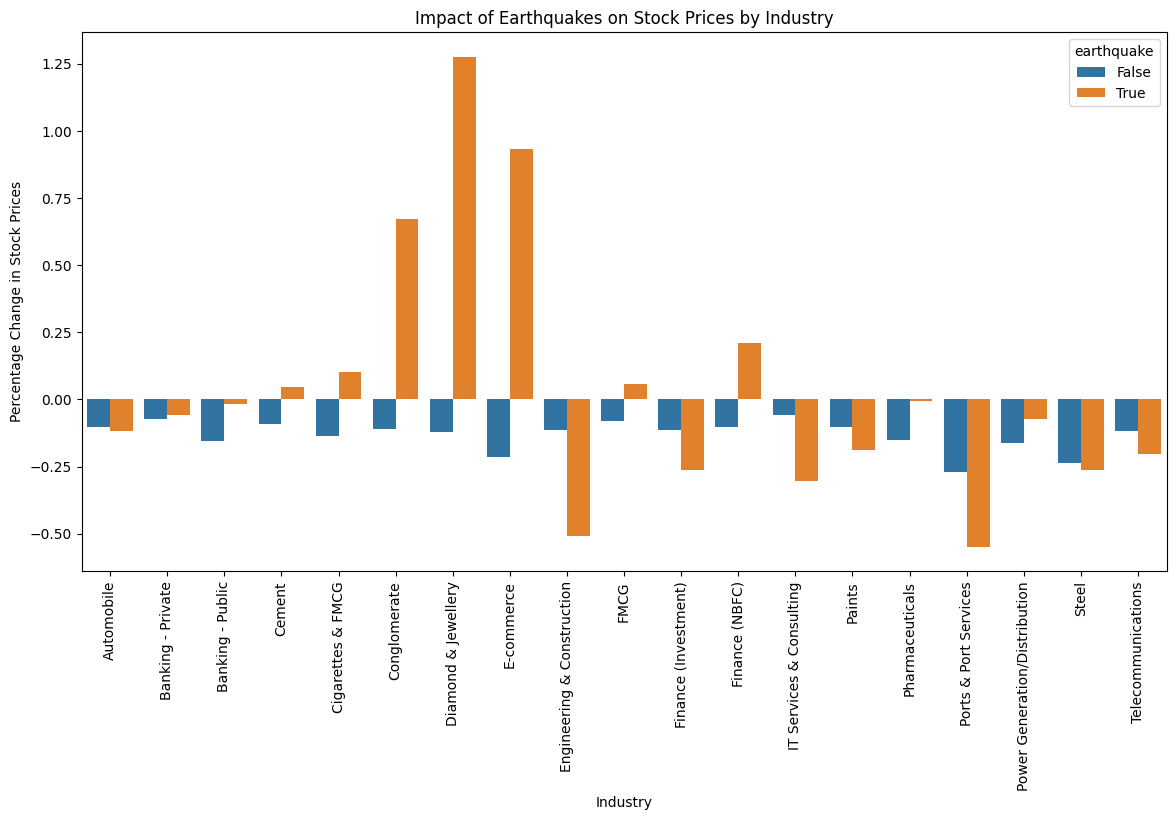

In [17]:
# Industry-wise Analysis
## To analyze the impact on different industries, we can group the data by Industry and perform similar analyses.

# Create a new column to indicate if there was an earthquake on that day
merged_data['earthquake'] = merged_data['magnitude'].notna()

# Group by Industry and earthquake to see the average change in stock prices
industry_impact_on_prices = merged_data.groupby(['Industry', 'earthquake']).agg({
    'Open': 'mean',
    'Close': 'mean'
}).reset_index()

# Calculate the percentage change in stock prices
industry_impact_on_prices['price_change'] = (industry_impact_on_prices['Close'] - industry_impact_on_prices['Open']) / industry_impact_on_prices['Open'] * 100

# Visualize the impact on stock prices by industry
plt.figure(figsize=(14, 7))
sns.barplot(x='Industry', y='price_change', hue='earthquake', data=industry_impact_on_prices)
plt.title('Impact of Earthquakes on Stock Prices by Industry')
plt.xlabel('Industry')
plt.ylabel('Percentage Change in Stock Prices')
plt.xticks(rotation=90)
plt.show()

In [16]:
# Number of Industries Affected
## To determine the number of industries affected by earthquakes, we can count the unique industries in the merged dataset.
unique_industries = merged_data['Industry'].nunique()

print(f"Number of unique industries: {unique_industries}")

Number of unique industries: 19


# How Market performs before and after earthquake in the range +-20 days?

In [18]:
# Set parameters
WINDOW_SIZE = 20  # Days before/after earthquake to analyze
BASE_DAYS = 3     # Days before earthquake to use as baseline

# Convert date columns to datetime
merged_data['Date'] = pd.to_datetime(merged_data['Date'])  # merged_data = merge from japan_stock_data and japan_earthquake
earthquake_dates = merged_data[merged_data['earthquake']]['Date'].unique()  # Unique dates prevent duplicate processing of same earthquake

In [19]:
# Create event study dataframe
## For each earthquake, creates a [-10, +10] day window around it.
event_data = []

for eq_date in earthquake_dates:
    start_date = eq_date - pd.Timedelta(days=WINDOW_SIZE)
    end_date = eq_date + pd.Timedelta(days=WINDOW_SIZE)
    
    window_data = merged_data[
        (merged_data['Date'] >= start_date) & 
        (merged_data['Date'] <= end_date)
    ].copy()
    
    window_data['days_from_event'] = (window_data['Date'] - eq_date).dt.days   # days_from_event: to track the number of days relative to the earthquake
    window_data['earthquake_id'] = eq_date   # earthquake_id : to identify the specific earthquake
    event_data.append(window_data)

In [20]:
# Combine all event windows and reset index (prevents index conflicts from different windows)
event_study = pd.concat(event_data).reset_index(drop=True)

# Calculate normalized values
def normalize_group(group):
    # Perform normalization on the non-grouping columns
    baseline_mask = (group['days_from_event'] >= -BASE_DAYS) & (group['days_from_event'] < 0)
    baseline = group.loc[baseline_mask, 'Close'].mean()
    
    if pd.notnull(baseline) and baseline != 0:
        group['normalized_close'] = (group['Close'] - baseline) / baseline * 100
    else:
        group['normalized_close'] = np.nan
    
    # Return the necessary columns, including grouping columns
    return group[['Date', 'Close', 'days_from_event', 'normalized_close',
                 'Industry', 'Ticker', 'earthquake_id']]

In [21]:
# Apply normalization
event_study = (
    event_study.groupby(['Industry', 'Ticker', 'earthquake_id'], group_keys=False)
              .apply(normalize_group)  # Do not use include_groups=False
              .reset_index(drop=True)
)

C:\Users\dongv\AppData\Local\Temp\ipykernel_18464\1083920541.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(normalize_group)  # Do not use include_groups=False


In [22]:
# Aggregate results
agg_results = event_study.groupby(['Industry', 'days_from_event'], as_index=False).agg(
    mean_change=('normalized_close', 'mean'),
    std_change=('normalized_close', 'std'),
    count=('normalized_close', 'count')
)

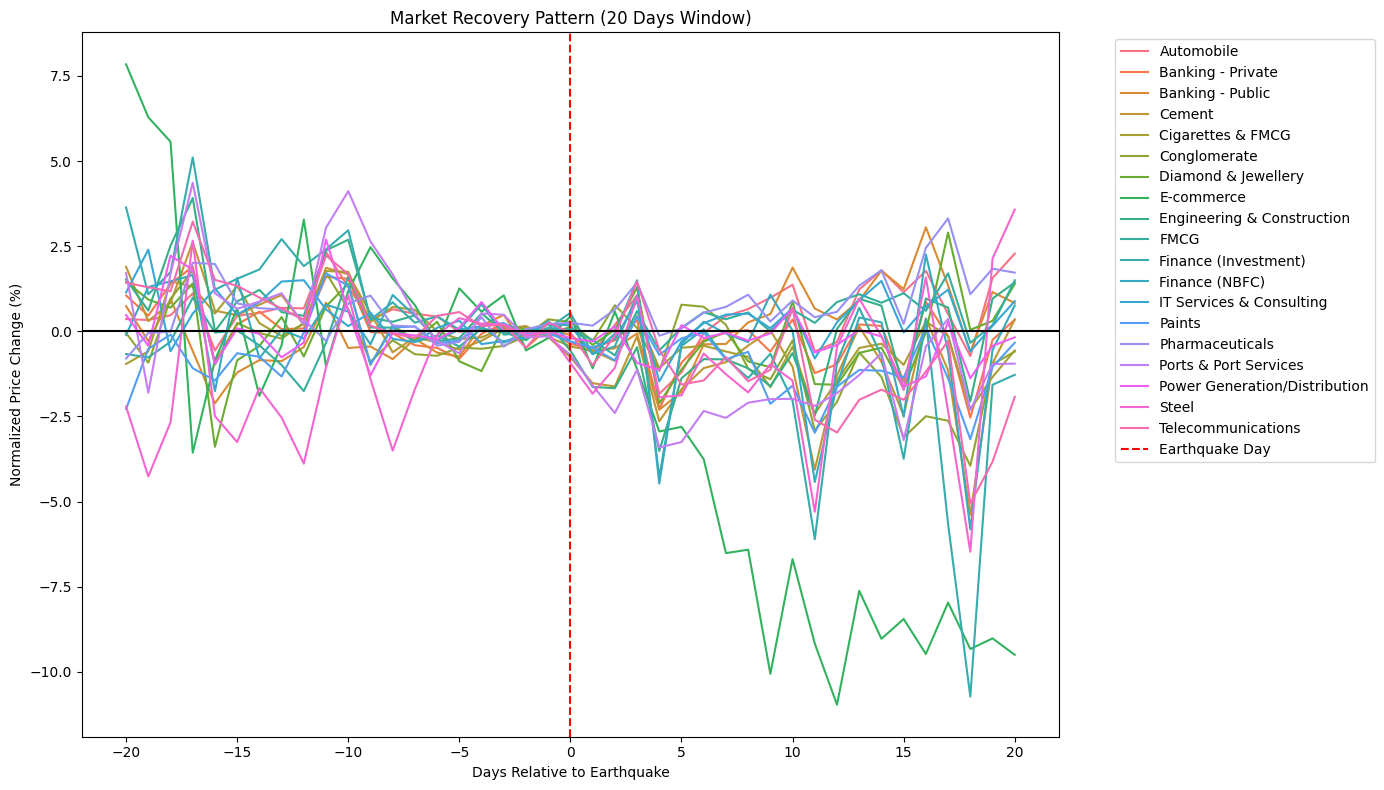

In [23]:
# Visualization
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=agg_results,
    x='days_from_event',
    y='mean_change',
    hue='Industry',
    errorbar=('ci', 95)
)
plt.axvline(0, color='red', linestyle='--', label='Earthquake Day')
plt.axhline(0, color='black', linestyle='-')
plt.title(f'Market Recovery Pattern ({WINDOW_SIZE} Days Window)')
plt.xlabel('Days Relative to Earthquake')
plt.ylabel('Normalized Price Change (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Time to recover

In [24]:
# Calculate and sort recovery metrics
recovery_analysis = (
    agg_results[agg_results['days_from_event'] >= 0]
    .groupby('Industry')
    .agg(
        max_impact=('mean_change', lambda x: x.min() if x.min() < 0 else x.max()),
        days_to_recover=('mean_change', lambda x: np.argmax(x >= 0) if any(x >= 0) else np.nan),
        volatility=('std_change', 'mean')
    )
    .reset_index()
    .sort_values('max_impact', ascending=True)  # Sort by most negative impact first
)

print("\nRecovery Metrics (Sorted by Maximum Impact):")
print(recovery_analysis.to_string(index=False))


Recovery Metrics (Sorted by Maximum Impact):
                     Industry  max_impact  days_to_recover  volatility
                   E-commerce  -10.962578                0    5.438943
         Finance (Investment)  -10.725698                0   11.788175
                        Steel   -6.470936                3   11.163838
               Finance (NBFC)   -5.811769                0    9.954967
                       Cement   -5.390094                9    6.719048
           Telecommunications   -5.058133                3    5.111494
                 Conglomerate   -3.949254                0    6.623593
   Engineering & Construction   -3.512619               12    6.776111
        Ports & Port Services   -3.410266               17    6.481071
                       Paints   -3.165983                3    5.610369
            Banking - Private   -2.532365                3    6.725765
            Cigarettes & FMCG   -2.422289                3    4.720947
             Banking - Public  